# Chapter 4. Training Models

## Notes and code-along

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

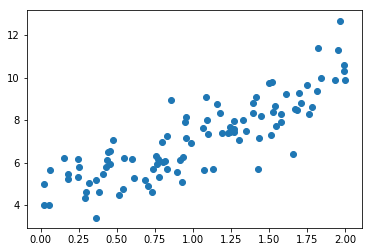

In [2]:
plt.scatter(X, y)
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 to each instance
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
# y = 4 + 3xo + GauNoise
theta_best

array([[4.22159074],
       [2.82267046]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.22159074],
       [9.86693165]])

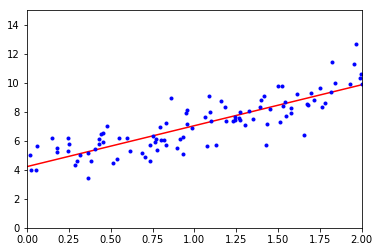

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.22159074],
       [9.86693165]])

In [8]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
theta

array([[4.22159074],
       [2.82267046]])

In [10]:
# SGD with simple learning scheduler
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [11]:
theta

array([[4.24013216],
       [2.76887178]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24090873]), array([2.85634494]))

## Polynomial Regression

In [14]:
m = 100
X = 6 * np.random.randn(m , 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

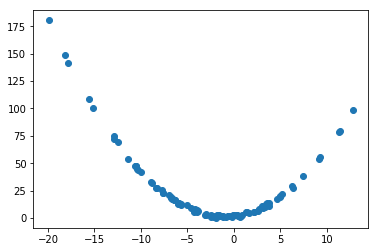

In [15]:
plt.scatter(X, y)
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.22861212])

In [18]:
X_poly[0]

array([-0.22861212,  0.0522635 ])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00404577]), array([[1.0362267 , 0.50267111]]))

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

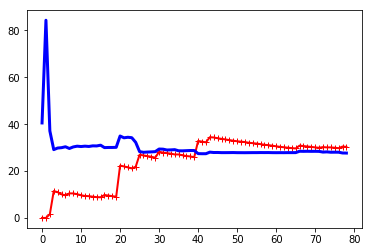

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

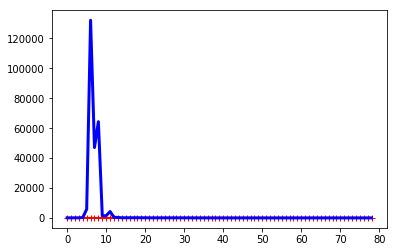

In [22]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y)

#### Ridge Reg

In [23]:
from sklearn.linear_model import Ridge

In [24]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [25]:
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [26]:
ridge_reg.predict([[1.5]])

array([[14.8605007]])

In [27]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([8.68389452])

#### Lasso

In [28]:
from sklearn.linear_model import Lasso

In [29]:
lasso_reg = Lasso(alpha=0.1)

In [30]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
lasso_reg.predict([[1.5]])

array([14.86808214])

#### Elastic-Net

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([14.87413367])

In [57]:
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train_poly_scaled' is not defined

#### Logistic Regression

In [33]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [47]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

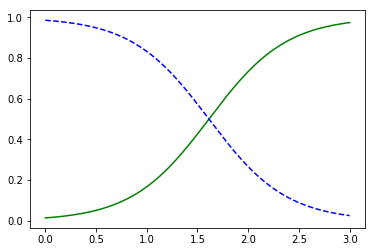

In [51]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### Softmax Regression

In [53]:
X = iris["data"][:, (2, 3)]
y = iris['target']

In [54]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
softmax_reg.predict([[5, 2]])

array([2])

In [56]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Exercises

1. What Linear Regression training algorithm can you use if you have a training set with millions of features?  
**A**: Gradient Descent.  
2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?  
**A**: Gradient Decent suffers from not scaling the features as it may take a long time to converge. Scale the features with StandartScaler.  
3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?  
**A**: No, since the sigmoid is a convex function and it will always arrive at the global minima.  
4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?  
**A**: Yes. Computational time is the only thing that is optimized by SGD and Minibatch SGD.
5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?    
**A**: The learning rate is high and the model instead of converging to the global minimum, increases the error. To combat this use annealing.  
6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?  
**A**: No, since the training is done on small batches of random samples.  
7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?  
**A**:SGD. Batch Gradient Descent. By adjusting the Learning Rate.
8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?  
**A**: The model is overfitting. A way to solve this is to 'feed' it more data so it can generalize.  
9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?  
**A**: The model suffers from high bias and it would benefit from reduction of the regularization hyperparameter alpha.  
10. Why would you want to use:  
    * Ridge Regression instead of Linear Regression?
    * Lasso instead of Ridge Regression?
    * Elastic Net instead of Lasso?  
**A**: Use Ridge, since its good to have some regularization, but use Lasso when you suspect not all of the issues are usefull. Use Elastic Net instead of Lasso if the feature space is bigger than the sample space and some features are correlated with others.  
11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?  
**A**: Softmax - since it is used for mutually exclusive classes.  
12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)  
**A**: Although for another course I have [already implemented it](https://github.com/gsam1/py-ml-stanford/blob/master/ml-ex2/Machine%20Learning%20Coursera%20Exercise%202%20Logistic%20Regression.ipynb) without sklearn.